# <span style="color:Red">Visitor Forecasting Model: Predicting People Traffic Using Time Series Analysis</span>


## Install the Required Packages

You need to install the following packages in your Jupyter environment before running the code:

- **pandas**: For handling the dataset.
- **prophet**: For forecasting the visitor count.
- **matplotlib**: For visualizing the results.
- **openpyxl**: For saving the forecast data into an Exceib openpyxl


In [ ]:
#To install above packages
!pip install pandas prophet matplotlib openpyxl


After installing the packages and placing the data, simply run the code. It will ask how many days you want to predict and will generate a forecast plot along with saving the results to an Excel file.


How many days do you want to forecast?  135


23:09:20 - cmdstanpy - INFO - Chain [1] start processing
23:09:20 - cmdstanpy - INFO - Chain [1] done processing


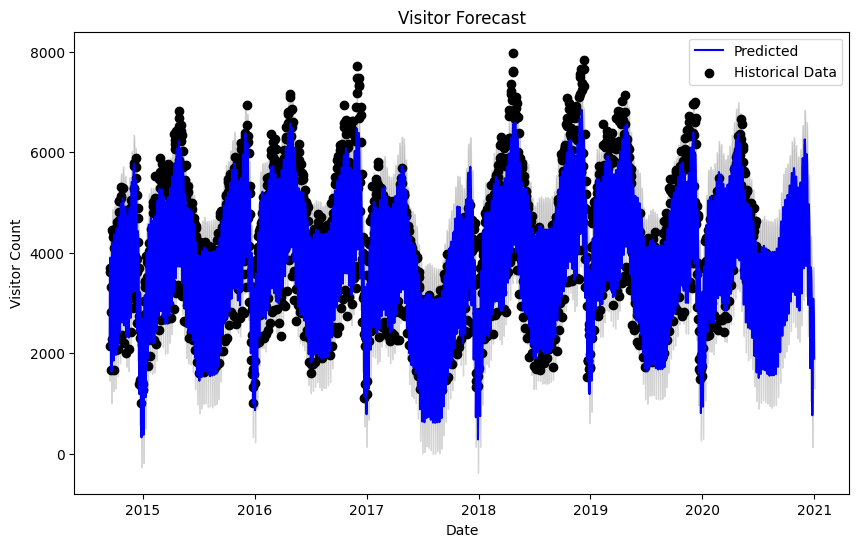

Forecast data has been saved to 'forecast_output.xlsx'.


In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('daily-website-visitors.csv')

# Convert 'Date' to datetime and 'Page.Loads' after removing commas
data['Date'] = pd.to_datetime(data['Date'])
data['Page.Loads'] = data['Page.Loads'].str.replace(',', '').astype(int)

# Select the required columns and rename them for Prophet
df = data[['Date', 'Page.Loads']].rename(columns={'Date': 'ds', 'Page.Loads': 'y'})

# Ask the user for the number of days to predict
num_days = int(input("How many days do you want to forecast? "))

# Initialize the Prophet model
model = Prophet()

# Uncomment the following lines to add holidays
# holidays = pd.DataFrame({
#   'holiday': 'some_holiday',
#   'ds': pd.to_datetime(['2022-01-01', '2023-01-01']),
#   'lower_window': 0,
#   'upper_window': 1,
# })
# model.add_country_holidays(country_name='US')  # Automatically include all US holidays
# model.add_regressor('is_weekend')  # Add weekend as a regressor if it's already in your dataframe
# model.holidays = holidays

# Fit the model
model.fit(df)

# Create future dataframe for the specified number of days
future = model.make_future_dataframe(periods=num_days)

# Predict future values
forecast = model.predict(future)

# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.3)
ax.scatter(df['ds'], df['y'], color='black', label='Historical Data')
ax.set_title('Visitor Forecast') 
ax.set_xlabel('Date') 
ax.set_ylabel('Visitor Count')  
ax.legend()
plt.show()

# Export the forecast data to an Excel file with more descriptive column names
forecast.rename(columns={
    'ds': 'Date',
    'yhat': 'Predicted Page Loads',
    'yhat_lower': 'Lower Confidence Limit',
    'yhat_upper': 'Upper Confidence Limit'
}).to_excel('forecast_output.xlsx', index=False)

print("Forecast data has been saved to 'visitor_forecast_output.xlsx'.")
